## Asst 1, Question 7
### Blair Nicolle

### Please Also See Main Assignment Document for Addnl Discussion.


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot stlying.
import numpy as np
import pandas as pd

import datetime
print(datetime.datetime.now())

## Show all lines of output and not just the output of the last statement in the iPython console
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

##For Jupyter
# %matplotlib inline  

#a pristine copy of the original dataframe
df_raw =  pd.read_csv("./OJ.csv", encoding='latin-1')

#df_full will eventually have addnl columns added to it during data engineering
df_full = df_raw



2019-11-11 22:28:09.399603


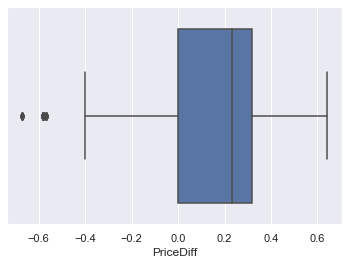

In [72]:
#### Some basic EDA 

#df_raw.columns
#Index(['Unnamed: 0', 'Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE'], dtype='object')

#Missing Values Detection

#Check for NaN's
df_full[pd.isnull(df_full).any(axis=1)]  #no NaN's

#Find any rows containing blank cells (there are none)
df_full.iloc[df_full[df_full.applymap(lambda x: str(x) == '').any(axis=1) == True].index.tolist(),:] #empty array

#df.head(3) #.columns

#df.dtypes  #only the class variable (aka target) is categorical.  All features are numeric.

# get min/max/count/std/mean numbers from each column. In particular, ,comparing max-min with std*3 to judge outliers
df_full.iloc[:,0:6].describe()
df_full.iloc[:, 6:].describe()

#Do some misc boxplot checks:
import seaborn as sns
#sns.boxplot(x=df_full['LoyalCH'])   #no outliers
sns.boxplot(x=df_full['PriceDiff'])  #few outliers around -0.6; these are ok (legit)


In [73]:

#Add Engineered Columns:
df_full['DiscDiff']    = df_full['DiscMM']    - df_full['DiscCH']
df_full['SpecialDiff'] = df_full['SpecialMM'] - df_full['SpecialCH']
df_full['PctDiscDiff'] = df_full['PctDiscMM'] - df_full['PctDiscCH']


#switch to shortform name (df):
df = df_full.loc[:,['WeekofPurchase','LoyalCH','StoreID','ListPriceDiff','DiscDiff','SalePriceMM','SalePriceCH','PriceDiff','SpecialCH','SpecialMM','SpecialDiff','PctDiscDiff','Purchase']]

#df.head(3) #.columns

#df.dtypes  #only the class variable (aka target) is categorical.  All features are numeric.

# get min/max/count/std/mean numbers from each column. In particular, ,comparing max-min with std*3 to judge outliers
df.iloc[:,0:6].describe()
df.iloc[:, 6:].describe()


## Pairplot (commenting out as it takes a while to run)
#sns.pairplot(df)


,SalePriceCH,PriceDiff,SpecialCH,SpecialMM,SpecialDiff,PctDiscDiff
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,1.815561,0.146486,0.147664,0.161682,0.014019,0.031985
std,0.143384,0.271563,0.354932,0.368331,0.549504,0.118465
min,1.390000,-0.670000,0.000000,0.000000,-1.000000,-0.251256
25%,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.860000,0.230000,0.000000,0.000000,0.000000,0.000000
75%,1.890000,0.320000,0.000000,0.000000,0.000000,0.095694
max,2.090000,0.640000,1.000000,1.000000,1.000000,0.402010


Text(0.5, 1.0, 'Minute Maid Purchases vs CH Loyalty')

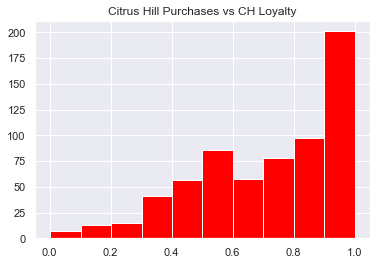

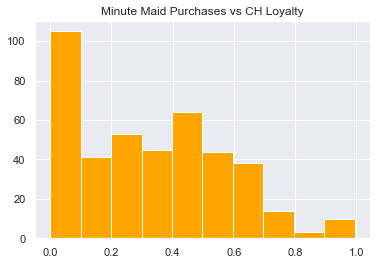

In [74]:
### Visual EDA ###

# Looking at loyalty metric versus purchase patterns
pd.DataFrame.hist(data = df_full.loc[df_full['Purchase']=='CH',['LoyalCH']], bins = 10, color=['red'])  
plt.title('Citrus Hill Purchases vs CH Loyalty')

pd.DataFrame.hist(data = df_full.loc[df_full['Purchase']=='MM',['LoyalCH']], bins = 10, color=['orange'])  
plt.title('Minute Maid Purchases vs CH Loyalty')


(13.01, -0.01)

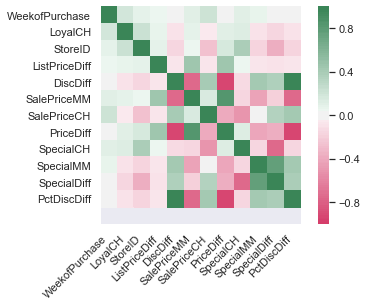

In [75]:

### Visual EDA ###


#show correlation matrix as heatmap
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 500, n=100),
    annot = False,
    square=True
)

##cmap=sns.diverging_palette(20, 220, n=200),
    
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
        
ax.set_ylim(len(df.columns)+0.01, -0.01)  #to get around a display bug in seaborn.
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


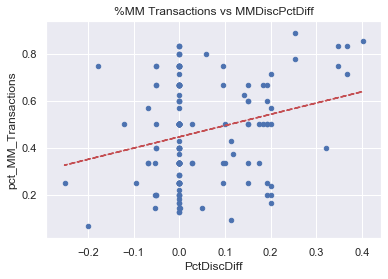

In [76]:
### Visual EDA ###

# See how much a Higher MM Discount leads to Higher % of MM Transactions

df_PurchMMCountAndPDD  = df.loc[df['Purchase'] == 'MM',:]    \
                    .groupby(["WeekofPurchase","StoreID"]) \
                    .agg({'Purchase' : 'count', 'PctDiscDiff' : 'mean'}) \
                    .rename(columns={'Purchase' : 'PurchaseMMCount','PctDiscDiff' : 'PctDiscDiff'}) \
                    .apply(lambda x : x )

df_PurchCHCount    = df.loc[df['Purchase'] == 'CH',:]    \
                    .groupby(["WeekofPurchase","StoreID"]) \
                    .agg({'Purchase' : 'count'}) \
                    .rename(columns={'Purchase' : 'PurchaseCHCount'}) \
                    .apply(lambda x : x )


#

#df_PurchMMCountAndPCD.head(3)

#df_graphable = df[.loc[:,['PctChgDiff','Purchase','Loyalty']]
df_graphable = pd.merge(df_PurchMMCountAndPDD,df_PurchCHCount, how='inner', on=['WeekofPurchase','StoreID'])
#df_graphable['PctChgDiff'] = df_PctChgDiff
df_graphable['PurchaseMMCount'] = df_graphable['PurchaseMMCount'].astype('float64') # pd.to_numeric(df_graphable['PurchaseMMCount'])
df_graphable['PurchaseCHCount'] = df_graphable['PurchaseCHCount'].astype('float64') # pd.to_numeric(df_graphable['PurchaseMMCount'])
df_graphable['pct_MM_Transactions'] = (df_graphable['PurchaseMMCount'])/(df_graphable['PurchaseCHCount'] + df_graphable['PurchaseMMCount'])

#df_graphable.head(5)
#df_graphable['Purchase_boolean'] = df['Purchase'].apply(lambda x : )
ax1 = df_graphable.plot.scatter(x ='PctDiscDiff', y = 'pct_MM_Transactions', title='%MM Transactions vs MMDiscPctDiff')
#ax1.title('%MM Transactions vs %DiscDiff (MM as %Tot)')

#add trendline
x = df_graphable['PctDiscDiff']
y = df_graphable['pct_MM_Transactions']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax1.plot(x,p(x),"r--")
#ax1.show()


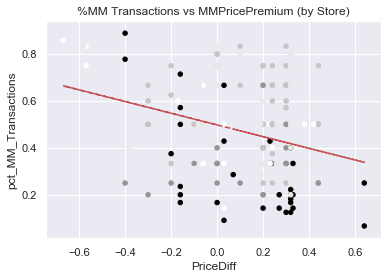

In [77]:

### Visual EDA ###

# See how much a Higher MM Discount leads to Higher % of MM Transactions

df_PurchMMCountAndPD  = df.loc[df['Purchase'] == 'MM',:]    \
                    .groupby(["WeekofPurchase","StoreID"]) \
                    .agg({'Purchase' : 'count', 'PriceDiff' : 'mean'}) \
                    .rename(columns={'Purchase' : 'PurchaseMMCount','PriceDiff' : 'PriceDiff'}) \
                    .apply(lambda x : x )

df_PurchCHCount    = df.loc[df['Purchase'] == 'CH',:]    \
                    .groupby(["WeekofPurchase","StoreID"]) \
                    .agg({'Purchase' : 'count', 'StoreID' : 'max'}) \
                    .rename(columns={'Purchase' : 'PurchaseCHCount', 'StoreID' : 'StoreNo'}) \
                    .apply(lambda x : x )


#

#df_PurchMMCountAndPCD.head(3)

#df_graphable = df[.loc[:,['PctChgDiff','Purchase','Loyalty']]
df_graphable = pd.merge(df_PurchMMCountAndPD,df_PurchCHCount, how='inner', on=['WeekofPurchase','StoreID'])
#df_graphable['PctChgDiff'] = df_PctChgDiff
df_graphable['PurchaseMMCount'] = df_graphable['PurchaseMMCount'].astype('float64') # pd.to_numeric(df_graphable['PurchaseMMCount'])
df_graphable['PurchaseCHCount'] = df_graphable['PurchaseCHCount'].astype('float64') # pd.to_numeric(df_graphable['PurchaseMMCount'])
df_graphable['pct_MM_Transactions'] = (df_graphable['PurchaseMMCount'])/(df_graphable['PurchaseCHCount'] + df_graphable['PurchaseMMCount'])


#df_graphable.head(5)
#df_graphable['Purchase_boolean'] = df['Purchase'].apply(lambda x : )
ax1 = df_graphable.plot.scatter(x ='PriceDiff', y = 'pct_MM_Transactions', title='%MM Transactions vs MMPricePremium (by Store)',color=df_graphable['StoreNo'])
#ax1.title('%MM Transactions vs %DiscDiff (MM as %Tot)')

#add trendline
x = df_graphable['PriceDiff']
y = df_graphable['pct_MM_Transactions']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax1.plot(x,p(x),"r--")
#ax1.show()


In [78]:

#performance metric choice


print ("\n******** CHOICE OF PERFORMANCE METRIC.... ********  \n")


print ("\nI am not clear on what the business motivation is, here.  is it ")
print ("\n just for inventory management / SKU re-ordering accuracy or is")
print ("\n is it to maximize revenue.  i wont do it for revenue calcs as ")
print ("\n we dont have #/units per transaction, anyway.  ")

print ("\n...I'll adopt F1 score as my performance metric to strike a nice \n")
print ("\n balance between not being too biased towards neither MM nor CH. \n")
print ("\n***************************************************  \n")




******** CHOICE OF PERFORMANCE METRIC.... ********  


I am not clear on what the business motivation is, here.  is it 

 just for inventory management / SKU re-ordering accuracy or is

 is it to maximize revenue.  i wont do it for revenue calcs as 

 we dont have #/units per transaction, anyway.  

...I'll adopt F1 score as my performance metric to strike a nice 


 balance between not being too biased towards neither MM nor CH. 


***************************************************  



In [79]:
## Class Balancer

from sklearn.utils import resample

# use shortname
#df = X_prepared

# Before
print("\nBefore Rebalancing:\n")
df.Purchase.value_counts()

# Separate majority and minority classes
df_majority = df[df.Purchase == 'CH']
df_minority = df[df.Purchase == 'MM']
 
nbr_samples = len(df_majority)

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=nbr_samples,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])
 

# Display new class counts
print("\nAfter Rebalancing:\n")
df_balanced.Purchase.value_counts()

#Ouput:
# MM    653
# CH    653
# Name: Purchase, dtype: int64



Before Rebalancing:


After Rebalancing:



MM    653
CH    653
Name: Purchase, dtype: int64

In [80]:

## Choice for Splitting into Test/Train Sets.

# plain old random sampling
from sklearn.model_selection import train_test_split

df_train_set, df_test_set = train_test_split(df_balanced, test_size=0.2, random_state=42)

#df_train_set.head(3)
#df_test_set.head(3)

# note: i can come back later and consider stratified sampling on bins made from the
# loyalCH feature.  honestly, i'm not sure if the stratas should be based on 
# that hypothetical bin or the label as the bin.  I dont think it matters much for this dataset, frankly.


In [81]:
### One quick helper function that will be used shortly.


#We can create custom Transformers using scikit learn, all you need to do is import BaseEstimator, and TransformerMixin
#from sklearn.base:

from sklearn.base import BaseEstimator, TransformerMixin

#Below class selects the Dataframe column attributes, will be used to select the numerical and categorical columns
#So that they can be isolated and prepared seperately as they have different preperation steps

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.DataFrame(X[self.attribute_names].values, columns=self.attribute_names)


In [82]:
# Another helper function


import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(true, pred):
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(true, pred, labels=['MM', 'CH'])

    #confusion_matrix = confusion_matrix(true, pred, labels=[1, 0])

    #label_encoder={0: "unoccupied", 1: "occupied"}
    
    import seaborn as sns; sns.set()
    import matplotlib.pyplot as plt

    cm_df = pd.DataFrame(confusion_matrix,
                 index = ['1', '0'], 
                 columns = ['1', '0'])
    ax = sns.heatmap(cm_df, fmt = 'd' , cmap="YlGnBu", cbar = False,  annot=True)
    ax.set_ylim(len(cm_df.columns)+0.01, -0.01)  #to get around a display bug in seaborn.
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

In [83]:
### FORMAL DATA PREPARATION PIPELINE ####

# Scale all the numeric features, except Store ID and Week ID.
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

##use short form
##df = df_train_set

# Define the num_attribs, cat_attribs, and labels
num_attribs = ['LoyalCH','ListPriceDiff','DiscDiff','SalePriceMM','SalePriceCH','PriceDiff','SpecialDiff','PctDiscDiff']
cat_attribs = ['WeekofPurchase','StoreID','SpecialCH','SpecialMM']
labels      = ['Purchase']

##strictly speaking we could further reduce the number of columns from the training partition
##X = df[num_attribs + cat_attribs]
##y = df[labels]

#X.head(3)
#y.head(9)

#numeric columns only; exclude boolean and nominals
num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('minmax_scaler', MinMaxScaler())    
        ])

#this cat_pipeline takes categorical data and dooes nothing with it (no onehotencoding needed, for eg)
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs))
])


#this combines above pipelines in order
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    
]) 

    
    
#  The features are now minmax-scaled and our label dataframe (y) is ready to go now.
X_train = full_pipeline.fit_transform(df_train_set[num_attribs + cat_attribs])
y_train = df_train_set[labels]


# use the test set to validated the model-predicted values, in y_predicted
X_test = full_pipeline.fit_transform(df_test_set[num_attribs + cat_attribs])
y_test = df_test_set[labels]



>>>>>>>>>>>>  1. DECISION TREE CLASSIFIER  <<<<<<<<<<<<<<<<<           


****************  CONFUSION MATRIX: ****************************



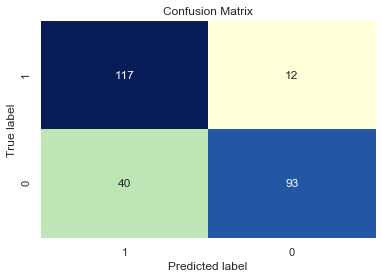



**************** Performance Measures *****************************
Accuracy = 0.80
Kappa = 0.60
F1 Score = 0.82


In [84]:
#### THE CLASSIFICATION MODELS #####

#################################################################
# 1. Decision Tree Classifier
#################################################################
print ("\n>>>>>>>>>>>>  1. DECISION TREE CLASSIFIER  <<<<<<<<<<<<<<<<<           \n");

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

## Hyperparameter Tuning
# E.g. criterion can be 'gini' or 'entropy'
clf_entropy = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             max_depth=4, 
                             max_leaf_nodes=5)
#                             min_samples_split=10, 
#                             min_samples_leaf=10, 


                             
#train model
clf_entropy.fit(X_train, y_train)

#test model
y_predicted = clf_entropy.predict(X_test)


###Gini provides an F1 of 0.82 and Accuracy of 0.81 Cohen Kappa 0.62 (not signifly diff from entropy-based)
###clf_gini = DecisionTreeClassifier(random_state=42, criterion="gini",
###                            min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
###clf_gini.fit(X_train, y_train)
###y_predicted = clf_gini.predict(X_test)


# looks like it is using class imbalance to show accurate results
print("\n****************  CONFUSION MATRIX: ****************************\n")
#print ("\nConfusion Matrix:\n")

plot_confusion_matrix(y_test, y_predicted)
#confusion_matrix( y_test, y_predicted )
print ("\n")


from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score

print('**************** Performance Measures *****************************')
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_predicted)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_predicted, pos_label="MM")))



>>>>>>>>>>>>  2. SVM  <<<<<<<<<<<<<<<<<           


****************  CONFUSION MATRIX: ****************************



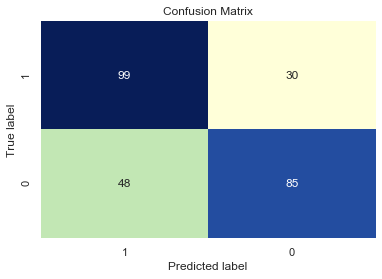



**************** Performance Measures *****************************
Accuracy = 0.70
Kappa = 0.41
F1 Score = 0.72


In [85]:

#################################################################
# 2.  SVM
#################################################################
print ("\n>>>>>>>>>>>>  2. SVM  <<<<<<<<<<<<<<<<<           \n");

from sklearn import svm
from sklearn.metrics import confusion_matrix

## Hyperparameter Tuning
#clf = svm.SVC(gamma=0.001)
#clf = svm.SVC(gamma=0.002)
#clf = svm.SVC(gamma=0.01)
clf = svm.SVC(gamma=0.02)

clf.fit(X_train, y_train.values.ravel() )
#confusion_matrix(y_test, clf.predict(X_test))

y_predicted = clf.predict(X_test)


# looks like it is using class imbalance to show accurate results
print("\n****************  CONFUSION MATRIX: ****************************\n")
#print ("\nConfusion Matrix:\n")
plot_confusion_matrix(y_test, y_predicted)
#confusion_matrix( y_test, y_predicted )
print ("\n")


from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score

print('**************** Performance Measures *****************************')
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_predicted)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_predicted, pos_label="MM")))




>>>>>>>>>>>>  3. K Nearest Neighbors  <<<<<<<<<<<<<<<<<           


****************  CONFUSION MATRIX: ****************************



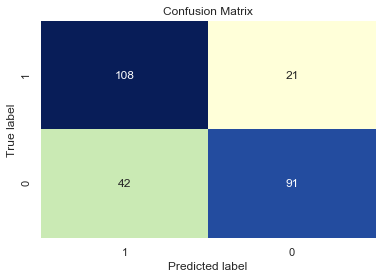



**************** Performance Measures *****************************
Accuracy = 0.76
Kappa = 0.52
F1 Score = 0.77


In [86]:

#################################################################
# 3.  K Nearest Neighbors
#################################################################
print ("\n>>>>>>>>>>>>  3. K Nearest Neighbors  <<<<<<<<<<<<<<<<<           \n");

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix
#import numpy as np #for ravel() function


## Hyperparameter Tuning
neigh = KNeighborsClassifier(n_neighbors=3)

#train
#neigh.fit(X_train, y_train)
neigh.fit(X_train, y_train.values.ravel())  

#test
y_predicted = neigh.predict(X_test)


# looks like it is using class imbalance to show accurate results
print("\n****************  CONFUSION MATRIX: ****************************\n")
#print ("\nConfusion Matrix:\n")
plot_confusion_matrix(y_test, y_predicted)
#confusion_matrix( y_test, y_predicted )
print ("\n")


from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score

print('**************** Performance Measures *****************************')
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_predicted)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_predicted, pos_label="MM")))




>>>>>>>>>>>>  4. Logistic Regression  <<<<<<<<<<<<<<<<<           


****************  CONFUSION MATRIX: ****************************



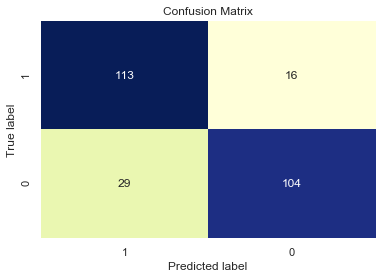



**************** Performance Measures *****************************
Accuracy = 0.83
Kappa = 0.66
F1 Score = 0.83


In [87]:

#################################################################
# 4.  Logistic Regression
#################################################################
print ("\n>>>>>>>>>>>>  4. Logistic Regression  <<<<<<<<<<<<<<<<<           \n");

from sklearn.linear_model import LogisticRegression



## Hyperparameter Tuning
#log_reg_clf = LogisticRegression(random_state=0, solver='lbfgs')
#log_reg_clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=300)
log_reg_clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=500)

#train
#neigh.fit(X_train, y_train)
log_reg_clf.fit(X_train, y_train.values.ravel())  

#test
y_predicted = log_reg_clf.predict(X_test)


# looks like it is using class imbalance to show accurate results
print("\n****************  CONFUSION MATRIX: ****************************\n")
#print ("\nConfusion Matrix:\n")
plot_confusion_matrix(y_test, y_predicted)
#confusion_matrix( y_test, y_predicted )
print ("\n")


from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score

print('**************** Performance Measures *****************************')
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_predicted)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_predicted, pos_label="MM")))




>>>>>>>>>>>>  5. XG Boost  <<<<<<<<<<<<<<<<<           


****************  CONFUSION MATRIX: ****************************



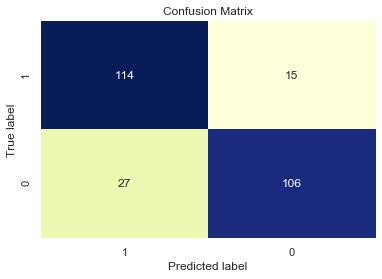



**************** Performance Measures *****************************
Accuracy = 0.84
Kappa = 0.68
F1 Score = 0.84


In [88]:

#################################################################
# 5.  XGBoost
#################################################################
print ("\n>>>>>>>>>>>>  5. XG Boost  <<<<<<<<<<<<<<<<<           \n");

from sklearn.ensemble import GradientBoostingClassifier

## Hyperparameter Tuning
#XG_clf = GradientBoostingClassifier()
#XG_clf = GradientBoostingClassifier(n_estimators = 120, min_samples_leaf=1,min_samples_split=3)
XG_clf = GradientBoostingClassifier(n_estimators = 140, min_samples_leaf=1,min_samples_split=2)

#train
#neigh.fit(X_train, y_train)
XG_clf.fit(X_train, y_train.values.ravel())  

#test
y_predicted = XG_clf.predict(X_test)


# looks like it is using class imbalance to show accurate results
print("\n****************  CONFUSION MATRIX: ****************************\n")
#print ("\nConfusion Matrix:\n")
plot_confusion_matrix(y_test, y_predicted)
#confusion_matrix( y_test, y_predicted )
print ("\n")


from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score

print('**************** Performance Measures *****************************')
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_predicted)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_predicted, pos_label="MM")))




>>>>>>>>>>>>  6. Random Forest Classifier  <<<<<<<<<<<<<<<<<           


****************  CONFUSION MATRIX: ****************************



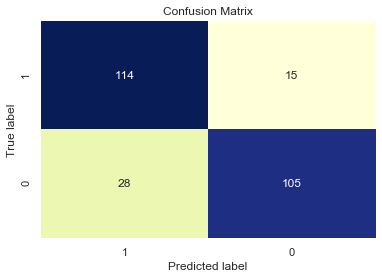



**************** Performance Measures *****************************
Accuracy = 0.84
Kappa = 0.67
F1 Score = 0.84


In [89]:

#################################################################
# 6.  Random Forest Classifier
#################################################################
print ("\n>>>>>>>>>>>>  6. Random Forest Classifier  <<<<<<<<<<<<<<<<<           \n");

from sklearn.ensemble import RandomForestClassifier

## Hyperparameter Tuning
#randfor_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
#randfor_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=12, n_jobs=-1)
randfor_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=10, n_jobs=-1)

#train
#neigh.fit(X_train, y_train)
randfor_clf.fit(X_train, y_train.values.ravel())  

#test
y_predicted = randfor_clf.predict(X_test)


# looks like it is using class imbalance to show accurate results
print("\n****************  CONFUSION MATRIX: ****************************\n")
#print ("\nConfusion Matrix:\n")
plot_confusion_matrix(y_test, y_predicted)
#confusion_matrix( y_test, y_predicted )
print ("\n")


from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score

print('**************** Performance Measures *****************************')
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_predicted)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_predicted, pos_label="MM")))

